Import Libraries

In [1]:
import os
import msoffcrypto
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.linear_model import LinearRegression
import pmdarima as pm
from pmdarima import model_selection
import math
import pytz
import datetime

In [320]:
xls = pd.ExcelFile("RawData13.xlsx")
Factor_data = pd.read_excel(xls,'Factor')
Gold_data = pd.read_excel(xls,'GoldBar_Sale')

In [321]:
factor_col = Factor_data.columns[1:]

In [322]:
factor_col

Index(['(Inflation)', 'PTT_แก๊สโซฮอล์_95', 'PTT_แก๊สโซฮอล์_91', 'PTT_ดีเซล',
       'อัตราแลกเปลี่ยน_USD_THB', 'BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย)',
       'SCB_ออมทรัพย์(อัตราดอกเบี้ย)', 'SCB_ประจำ_3_เดือน(อัตราดอกเบี้ย)',
       'SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)', 'SCB_ประจำ_12_เดือน(อัตราดอกเบี้ย)',
       'XAU_USD'],
      dtype='object')

In [323]:
for month in range(1,10):
    Factor_data[[i+f'_LAG_{month}' for i in factor_col]] = Factor_data[factor_col].shift(month)

C:\Users\temp5\AppData\Local\Temp\ipykernel_5456\466376135.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Factor_data[[i+f'_LAG_{month}' for i in factor_col]] = Factor_data[factor_col].shift(month)


In [324]:
Factor_data.columns

Index(['Report Date', '(Inflation)', 'PTT_แก๊สโซฮอล์_95', 'PTT_แก๊สโซฮอล์_91',
       'PTT_ดีเซล', 'อัตราแลกเปลี่ยน_USD_THB',
       'BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย)',
       'SCB_ออมทรัพย์(อัตราดอกเบี้ย)', 'SCB_ประจำ_3_เดือน(อัตราดอกเบี้ย)',
       'SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)',
       ...
       'PTT_แก๊สโซฮอล์_95_LAG_9', 'PTT_แก๊สโซฮอล์_91_LAG_9', 'PTT_ดีเซล_LAG_9',
       'อัตราแลกเปลี่ยน_USD_THB_LAG_9',
       'BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย)_LAG_9',
       'SCB_ออมทรัพย์(อัตราดอกเบี้ย)_LAG_9',
       'SCB_ประจำ_3_เดือน(อัตราดอกเบี้ย)_LAG_9',
       'SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_9',
       'SCB_ประจำ_12_เดือน(อัตราดอกเบี้ย)_LAG_9', 'XAU_USD_LAG_9'],
      dtype='object', length=111)

In [325]:
# for month in range(1,4):
#     Factor_data[['DIFF_'+i+f'_LAG_{month}' for i in factor_col]] = \
#     Factor_data[factor_col].values - Factor_data[[i+f'_LAG_{month}' for i in factor_col]].values

In [326]:
# diff MoM LAG 1-12 Months
# for month in range(1,13):
#     Factor_data[['DIFF_'+i+f'_MoM_LAG_{month}' for i in factor_col]] = Factor_data[['DIFF_'+i+f'_LAG_1' for i in factor_col]].shift(month)

In [327]:
# Factor_data[['LOG_'+i for i in factor_col]] = \
#     Factor_data[[i for i in factor_col]].apply(np.log)
for month in range(0,2):
    Factor_data[['LOG_'+i+f'_LAG_{month}' if month!=0 else 'LOG_'+i for i in factor_col]] = \
    Factor_data[[i+f'_LAG_{month}' if month!=0 else i for i in factor_col]].apply(np.log)

C:\Users\temp5\AppData\Local\Temp\ipykernel_5456\563302744.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Factor_data[['LOG_'+i+f'_LAG_{month}' if month!=0 else 'LOG_'+i for i in factor_col]] = \
C:\Users\temp5\AppData\Local\Temp\ipykernel_5456\563302744.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Factor_data[['LOG_'+i+f'_LAG_{month}' if month!=0 else 'LOG_'+i for i in factor_col]] = \
C:\Users\temp5\AppData\Local\Temp\ipykernel_5456\563302744.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usuall

In [328]:
Factor_data.columns

Index(['Report Date', '(Inflation)', 'PTT_แก๊สโซฮอล์_95', 'PTT_แก๊สโซฮอล์_91',
       'PTT_ดีเซล', 'อัตราแลกเปลี่ยน_USD_THB',
       'BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย)',
       'SCB_ออมทรัพย์(อัตราดอกเบี้ย)', 'SCB_ประจำ_3_เดือน(อัตราดอกเบี้ย)',
       'SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)',
       ...
       'LOG_PTT_แก๊สโซฮอล์_95_LAG_1', 'LOG_PTT_แก๊สโซฮอล์_91_LAG_1',
       'LOG_PTT_ดีเซล_LAG_1', 'LOG_อัตราแลกเปลี่ยน_USD_THB_LAG_1',
       'LOG_BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย)_LAG_1',
       'LOG_SCB_ออมทรัพย์(อัตราดอกเบี้ย)_LAG_1',
       'LOG_SCB_ประจำ_3_เดือน(อัตราดอกเบี้ย)_LAG_1',
       'LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1',
       'LOG_SCB_ประจำ_12_เดือน(อัตราดอกเบี้ย)_LAG_1', 'LOG_XAU_USD_LAG_1'],
      dtype='object', length=133)

In [329]:
# ln(self/lag) -> lag 12 months
# for month in range(1,13):
#     Factor_data[['LOG_('+i+f'/{i}_LAG_{month})' for i in factor_col]] = \
#     np.log(Factor_data[[i for i in factor_col]].values/Factor_data[[f'{i}_LAG_{month}' for i in factor_col]].values)

In [330]:
# Factor_data.columns

In [331]:
# ln(self/lag) MoM lag 1-12 months
# for month in range(1,13):
#     Factor_data[['LOG_MoM_('+i+f'/{i}_LAG_1)_LAG_{month}' for i in factor_col]] = Factor_data[['LOG_('+i+f'/{i}_LAG_1)' for i in factor_col]].shift(month)

In [332]:
# Factor_data.columns

In [333]:
Gold_Factor_data = \
                pd.merge(
                    Gold_data,
                    Factor_data,
                    left_on = 'Report Date',
                    right_on = 'Report Date',
                    how = 'left'
                )

In [334]:
Gold_Factor_data.replace([np.inf, -np.inf, np.nan],0,inplace=True)
# Gold_Factor_data.replace([np.inf, -np.inf],np.nan,inplace=True)
Gold_Factor_data = Gold_Factor_data.dropna(axis='columns')

In [335]:
Gold_Factor_data.columns

Index(['Report Date', 'GoldBar_Sale', '(Inflation)', 'PTT_แก๊สโซฮอล์_95',
       'PTT_แก๊สโซฮอล์_91', 'PTT_ดีเซล', 'อัตราแลกเปลี่ยน_USD_THB',
       'BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย)',
       'SCB_ออมทรัพย์(อัตราดอกเบี้ย)', 'SCB_ประจำ_3_เดือน(อัตราดอกเบี้ย)',
       ...
       'LOG_PTT_แก๊สโซฮอล์_95_LAG_1', 'LOG_PTT_แก๊สโซฮอล์_91_LAG_1',
       'LOG_PTT_ดีเซล_LAG_1', 'LOG_อัตราแลกเปลี่ยน_USD_THB_LAG_1',
       'LOG_BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย)_LAG_1',
       'LOG_SCB_ออมทรัพย์(อัตราดอกเบี้ย)_LAG_1',
       'LOG_SCB_ประจำ_3_เดือน(อัตราดอกเบี้ย)_LAG_1',
       'LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1',
       'LOG_SCB_ประจำ_12_เดือน(อัตราดอกเบี้ย)_LAG_1', 'LOG_XAU_USD_LAG_1'],
      dtype='object', length=134)

In [336]:
Gold_Factor_data['LOGIT'] = np.log(Gold_Factor_data['GoldBar_Sale'].values)
Gold_Factor_data['LOGIT'].replace([np.inf, -np.inf, np.nan],0,inplace=True)

C:\Users\temp5\AppData\Local\Temp\ipykernel_5456\3363949668.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Gold_Factor_data['LOGIT'].replace([np.inf, -np.inf, np.nan],0,inplace=True)


In [337]:
Factor_data.columns

Index(['Report Date', '(Inflation)', 'PTT_แก๊สโซฮอล์_95', 'PTT_แก๊สโซฮอล์_91',
       'PTT_ดีเซล', 'อัตราแลกเปลี่ยน_USD_THB',
       'BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย)',
       'SCB_ออมทรัพย์(อัตราดอกเบี้ย)', 'SCB_ประจำ_3_เดือน(อัตราดอกเบี้ย)',
       'SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)',
       ...
       'LOG_PTT_แก๊สโซฮอล์_95_LAG_1', 'LOG_PTT_แก๊สโซฮอล์_91_LAG_1',
       'LOG_PTT_ดีเซล_LAG_1', 'LOG_อัตราแลกเปลี่ยน_USD_THB_LAG_1',
       'LOG_BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย)_LAG_1',
       'LOG_SCB_ออมทรัพย์(อัตราดอกเบี้ย)_LAG_1',
       'LOG_SCB_ประจำ_3_เดือน(อัตราดอกเบี้ย)_LAG_1',
       'LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1',
       'LOG_SCB_ประจำ_12_เดือน(อัตราดอกเบี้ย)_LAG_1', 'LOG_XAU_USD_LAG_1'],
      dtype='object', length=133)

In [338]:
Gold_Factor_data['LOGIT']

0       9.888374
1       9.920836
2       9.920836
3       9.982761
4       9.998798
         ...    
151    10.373491
152    10.393600
153    10.439981
154    10.422281
155    10.423768
Name: LOGIT, Length: 156, dtype: float64

In [339]:
Gold_Factor_data.to_excel("LAG_RESULT.xlsx")

เลือกตัวแปรที่สนใจ และเกี่ยวข้องกับทองคำ

In [340]:
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.tsa.stattools import adfuller
main_Factor_list = factor_col
# Factor_list = Gold_Factor_data.drop(columns = ['GoldBar_Sale'] ).columns
# Factor_list = Gold_Factor_data.drop(columns = ['Report Date','GoldBar_Sale','LOGIT']).columns
Factor_list = Gold_Factor_data.drop(columns = ['Report Date','GoldBar_Sale','LOGIT']).columns
All_result_table = pd.DataFrame()
All_result_table_best = pd.DataFrame()

for ix , temp_factor_group in enumerate(main_Factor_list,1):
    Factor_group = [i for i in Factor_list if temp_factor_group in i]
    r2_list = []
    # print(ix , " " , temp_factor_group , " " , Factor_group)
    # print(Factor_group)
    temp_result_table = pd.DataFrame()
    for temp_factor in Factor_group:
        X_train = np.array(Gold_Factor_data[temp_factor].values , dtype=float)
        y_train = np.array(Gold_Factor_data['LOGIT'].values , dtype=float)
        # y_train = np.array(Gold_Factor_data['GoldBar_Sale'].values , dtype=float)
        
        X_train_1 = X_train.reshape(-1,1)
        y_train_1 = y_train.reshape(-1,1)

        # test stationary test 10%
        adf = adfuller(X_train)[1]
        adf_result = 'PASS' if adfuller(X_train)[1] <= 0.4 else 'FAIL'

        #Regression
        linear_model = LinearRegression()
        linear_model.fit(X_train_1 , y_train_1)

        X_train = sm.add_constant(X_train)
        reg = sm.OLS(y_train , X_train).fit()
        sign = '+' if linear_model.coef_ > 0 else '-'

        r2_list.append((temp_factor,reg.rsquared,sign,adf,adf_result))
        # print(r2_list)

    temp_result_table['Factor'] = np.array(r2_list)[:,0]
    temp_result_table['r2'] = np.array(r2_list)[:,1]
    temp_result_table['sign'] = np.array(r2_list)[:,2]
    temp_result_table['adf'] = np.array(r2_list)[:,3]
    temp_result_table['adf_result'] = np.array(r2_list)[:,4]

    temp_result_table_sort = temp_result_table.sort_values(['adf_result','r2'], ascending = [False,False]).reset_index(drop=True)

    if ix == 1:
        All_result_table = temp_result_table
        All_result_table_best = temp_result_table_sort.head(1)
    else:
        All_result_table = pd.concat([All_result_table,temp_result_table], ignore_index = True)
        All_result_table_best = pd.concat([All_result_table,temp_result_table_sort.head(1)], ignore_index = True)
All_result_table

,Factor,r2,sign,adf,adf_result
0,(Inflation),0.05187151977125404,+,0.384208513196113,PASS
1,(Inflation)_LAG_1,0.054405709215588516,+,0.3362302389299119,PASS
2,(Inflation)_LAG_2,0.055283130021961724,+,0.19741664974776724,PASS
3,(Inflation)_LAG_3,0.05670107871432539,+,0.3039389850156042,PASS
4,(Inflation)_LAG_4,0.05645775960343169,+,0.3660969987165338,PASS
...,...,...,...,...,...
127,XAU_USD_LAG_7,1.2261600439988918e-05,+,0.0017321172117057229,PASS
128,XAU_USD_LAG_8,0.0010457091970103027,-,0.0030292580053241135,PASS
129,XAU_USD_LAG_9,0.0032627510570611973,-,0.004678169178184846,PASS
130,LOG_XAU_USD,0.0006549384190054353,+,0.19306634129907924,PASS


In [341]:
Factor_list

Index(['(Inflation)', 'PTT_แก๊สโซฮอล์_95', 'PTT_แก๊สโซฮอล์_91', 'PTT_ดีเซล',
       'อัตราแลกเปลี่ยน_USD_THB', 'BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย)',
       'SCB_ออมทรัพย์(อัตราดอกเบี้ย)', 'SCB_ประจำ_3_เดือน(อัตราดอกเบี้ย)',
       'SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)', 'SCB_ประจำ_12_เดือน(อัตราดอกเบี้ย)',
       ...
       'LOG_PTT_แก๊สโซฮอล์_95_LAG_1', 'LOG_PTT_แก๊สโซฮอล์_91_LAG_1',
       'LOG_PTT_ดีเซล_LAG_1', 'LOG_อัตราแลกเปลี่ยน_USD_THB_LAG_1',
       'LOG_BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย)_LAG_1',
       'LOG_SCB_ออมทรัพย์(อัตราดอกเบี้ย)_LAG_1',
       'LOG_SCB_ประจำ_3_เดือน(อัตราดอกเบี้ย)_LAG_1',
       'LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1',
       'LOG_SCB_ประจำ_12_เดือน(อัตราดอกเบี้ย)_LAG_1', 'LOG_XAU_USD_LAG_1'],
      dtype='object', length=132)

In [342]:
Pass_Factor_list = All_result_table[All_result_table['adf_result'] == 'PASS']
Pass_Factor_list.to_excel("ADF_RESULT_PASS.xlsx")

In [343]:
Pass_Factor_list = Pass_Factor_list['Factor']

Overall Model Performance

In [369]:
from itertools import combinations
# comb_list = [i for i in combinations(Pass_Factor_list , 3)] + [i for i in combinations(Pass_Factor_list, 2)]
comb_list = [i for i in combinations(Pass_Factor_list , 2)]
# comb_list = [i for i in combinations(Pass_Stat_list['FACTOR_1'], 2)]
len(comb_list)
# 2 fac
#5000 = 2 min
#2346 = 50 sec
#30856 = 14 min
#4186 = 1.34 min/sec
#9453 = 3.32 min/sec
#17020 = 6.52 min/sec # 7.45.39 min/sec/msec
# 1 fac
#185 = 12ms

7503

In [346]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import anderson as AD
from statsmodels.stats.outliers_influence import variance_inflation_factor

all_stats_results = pd.DataFrame()

# y_train = np.array(Gold_Factor_data['GoldBar_Sale'].values , dtype=float)
y_train = np.array(Gold_Factor_data['LOGIT'].values , dtype=float)

for out_index , comb in enumerate(comb_list,1):
    selected_Factor = list(comb)
    X_train = np.array(Gold_Factor_data[selected_Factor].values , dtype = float)

    linear_model = LinearRegression()
    linear_model.fit(X_train , y_train)

    X_train = sm.add_constant(X_train)
    reg = sm.OLS(y_train , X_train).fit()

    X_train = X_train[:,1:]
    y_pred = linear_model.predict(X_train)

    stats_results = pd.DataFrame()
    stats_results[[f'FACTOR_{i+1}' for i in range(len(selected_Factor))]] = np.array([selected_Factor])

    coeff_result = reg.summary2().tables[1].iloc[:,:1].transpose().reset_index(drop=True)
    # for i in ['const','x1']:
    for i in ['const','x1','x2']:
        if i in coeff_result.columns:
            stats_results[i] = coeff_result[i]
        else:
            stats_results[i] = None
    # P-Value
    stats_results[['intercept_p_value'] + [f'FACTOR_{i+1}_p_value' for i in range(len(selected_Factor))]] = reg.pvalues
    # ADJ Rsq
    r2 = r2_score(y_train,y_pred)
    n , p = X_train.shape
    adj_r2 = 1 - (( 1 - r2 ) * (n - 1) / (n - p - 1))
    stats_results['r2'] = r2
    stats_results['adj_r2'] = adj_r2
    # F stats
    stats_results['Probability of F-Stats'] = reg.summary2().tables[0][3].astype(float)[5]
    # Anderson Darling
    stats_results['AD'] = AD(reg.resid , dist='norm')[0]
    stats_results['AD_criteria'] = [{i:j for i , j in zip(AD( reg.resid , dist='norm')[2],
                                                         AD( reg.resid , dist='norm')[1]
                                                         )}]
    stats_results['AD_criteria_0.05'] = AD( reg.resid , dist='norm')[1][2:3]
    # Breusch-Pagan
    name_stats = ['Lagrange multiplier statistic','p-value','f-value','f p-value']
    test = sm.stats.het_breuschpagan(reg.resid , reg.model.exog )
    stats_results['BP_pvalues'] = lzip(name_stats , test )[1][1]
    # Durbin Watson
    stats_results['Durbin_Watson'] = sm.stats.durbin_watson(reg.resid)
    # VIF 
    VIF_values = [variance_inflation_factor(Gold_Factor_data[selected_Factor].values , i) for i in range(len(selected_Factor))]

    for in_index , i in enumerate(selected_Factor , 0 ):
        stats_results[f'VIF_Factor_{in_index+1}'] = VIF_values[in_index]
    if out_index == 1:
        all_stats_results = stats_results
    else:
        all_stats_results = pd.concat([all_stats_results, stats_results], axis = 0).reset_index(drop=True)
all_stats_results = all_stats_results.sort_values('adj_r2', ascending = False)

In [350]:
Pass_Stat_list = all_stats_results

In [348]:
#Adj Stats in factor to interesting
Pass_Stat_list = all_stats_results[all_stats_results['r2'] >= 0.5]
Pass_Stat_list = all_stats_results[all_stats_results['adj_r2'] >= 0.5]
Pass_Stat_list = Pass_Stat_list[Pass_Stat_list['Probability of F-Stats'] <= 0.5]
Pass_Stat_list = Pass_Stat_list[Pass_Stat_list['AD'] < Pass_Stat_list['AD_criteria_0.05']]
Pass_Stat_list = Pass_Stat_list[Pass_Stat_list['BP_pvalues'] > 0.05]
# Pass_Stat_list = Pass_Stat_list[Pass_Stat_list['Durbin_Watson'] >= 1] # ใช้ไมได้
Pass_Stat_list = Pass_Stat_list[Pass_Stat_list['VIF_Factor_1'] <= 5]
Pass_Stat_list = Pass_Stat_list[Pass_Stat_list['VIF_Factor_2'] <= 5]
# Pass_Stat_list = Pass_Stat_list[Pass_Stat_list['VIF_Factor_3'] <= 5]
# Pass_Stat_list = Pass_Stat_list[Pass_Stat_list['VIF_Factor_4'] <= 5]
# Pass_Stat_list = Pass_Stat_list[(Pass_Stat_list['VIF_Factor_3'] <= 5 | (Pass_Stat_list['VIF_Factor_3'].isna()))]

In [370]:
# Pass_Stat_list['adj_r2'].max()
# Pass_Stat_list[Pass_Stat_list['adj_r2'].values == Pass_Stat_list['adj_r2'].max()]
# Pass_Stat_list.describe()
# Pass_Stat_list.info()
Pass_Stat_list[['FACTOR_1','FACTOR_2','const','x1','x2','r2','adj_r2','AD','AD_criteria_0.05','BP_pvalues','Durbin_Watson','Probability of F-Stats','VIF_Factor_1','VIF_Factor_2']]
# Pass_Stat_list[['FACTOR_1','intercept_p_value','const','x1','r2','adj_r2','AD','AD_criteria_0.05','BP_pvalues','Durbin_Watson','Probability of F-Stats']]


,FACTOR_1,FACTOR_2,const,x1,x2,r2,adj_r2,AD,AD_criteria_0.05,BP_pvalues,Durbin_Watson,Probability of F-Stats,VIF_Factor_1,VIF_Factor_2
5524,BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย),LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย),9.360097,0.430980,-7.804097e-01,0.719636,0.715971,0.366873,0.768,0.000010,0.423728,5.630000e-43,1.361817,1.361817
5587,BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย)_LAG_1,LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1,9.457177,0.373935,-7.063548e-01,0.687096,0.683006,0.801631,0.768,0.144062,0.458204,2.510000e-39,1.361141,1.361141
5525,BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย),LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1,9.486343,0.351644,-6.649042e-01,0.668586,0.664254,0.567150,0.768,0.000487,0.320584,2.030000e-37,1.343335,1.343335
5514,BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย),LOG_SCB_ประจำ_3_เดือน(อัตราดอกเบี้ย),9.115071,0.468568,-8.194530e-01,0.654967,0.650457,0.843023,0.768,0.000111,0.415940,4.430000e-36,1.020085,1.020085
5515,BOT_Policy_rate_(อัตราดอกเบี้ย นโยบาย),LOG_SCB_ประจำ_3_เดือน(อัตราดอกเบี้ย)_LAG_1,9.254923,0.395681,-7.156216e-01,0.638253,0.633524,0.823575,0.768,0.000104,0.339948,1.650000e-34,1.018077,1.018077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7443,XAU_USD,XAU_USD_LAG_7,10.032051,0.000004,8.475805e-07,0.000073,-0.012998,5.590424,0.768,0.424621,0.045976,9.940000e-01,9.861041,9.861041
1386,LOG_(Inflation)_LAG_1,XAU_USD,10.031867,-0.000368,5.387986e-06,0.000070,-0.013001,5.608431,0.768,0.405791,0.046185,9.950000e-01,1.001403,1.001403
1175,LOG_(Inflation),LOG_(Inflation)_LAG_1,10.040313,-0.000836,1.559676e-03,0.000026,-0.013046,5.624130,0.768,0.444576,0.045691,9.980000e-01,2.838502,2.838502
1393,LOG_(Inflation)_LAG_1,XAU_USD_LAG_7,10.038937,0.000742,9.455612e-07,0.000024,-0.013047,5.601619,0.768,0.322473,0.045747,9.980000e-01,1.005339,1.005339


In [156]:
Pass_Stat_list.to_excel("Pass_Stat_list.xlsx")

In [163]:
# ตัวแปรที่สนใจ 
Factor_interested = ['(Inflation)_LAG_6','LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1']
Factor_value = [9.925955,0.117846,-0.259044]

In [164]:
Test_Stat =Pass_Stat_list[(Pass_Stat_list['FACTOR_1'] == '(Inflation)_LAG_6') & (Pass_Stat_list['FACTOR_2'] == 'LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1')]

In [165]:
New_Predict = (Test_Stat['const'].values + (Test_Stat['x1'].values * Gold_Factor_data[Test_Stat['FACTOR_1']].values) +\
                     (Test_Stat['x2'].values * (Gold_Factor_data[Test_Stat['FACTOR_2']].values)))
# New_Predict.to_excel('Test.xlsx')
np.exp(New_Predict)

array([[20454.4270702 ],
       [18415.00993053],
       [18415.00993053],
       [18109.70134501],
       [17565.50097813],
       [17565.50097813],
       [20100.77722324],
       [19999.40939862],
       [19841.55004647],
       [20897.51618322],
       [21983.75860348],
       [22165.85696483],
       [22244.36014182],
       [22936.47336422],
       [23255.66161179],
       [23173.58942325],
       [23200.91458627],
       [22580.5112879 ],
       [22794.39912316],
       [22713.95478863],
       [22821.27716353],
       [21213.31416394],
       [21109.19208985],
       [21432.47820757],
       [21306.56332627],
       [21056.94845112],
       [21356.84026522],
       [21231.36975355],
       [21281.46925878],
       [21056.94845112],
       [20614.9879707 ],
       [20566.45745407],
       [19758.7009984 ],
       [19642.61948572],
       [19094.85094708],
       [19347.11738397],
       [19416.15794384],
       [19474.92178959],
       [19459.46575199],
       [20576.08526125],


In [167]:
Prediction_df = pd.DataFrame()
Prediction_df['Report Date'] =Gold_Factor_data['Report Date']
Prediction_df['Predict GoldBar_Sale price (Forward looking)'] = np.exp(New_Predict)
Prediction_df['LOG'] = New_Predict
Prediction_df.to_excel('Prediction.xlsx')

Actual data vs Predict data (GoldBar_Sale price in Thailnad) 2 Factor

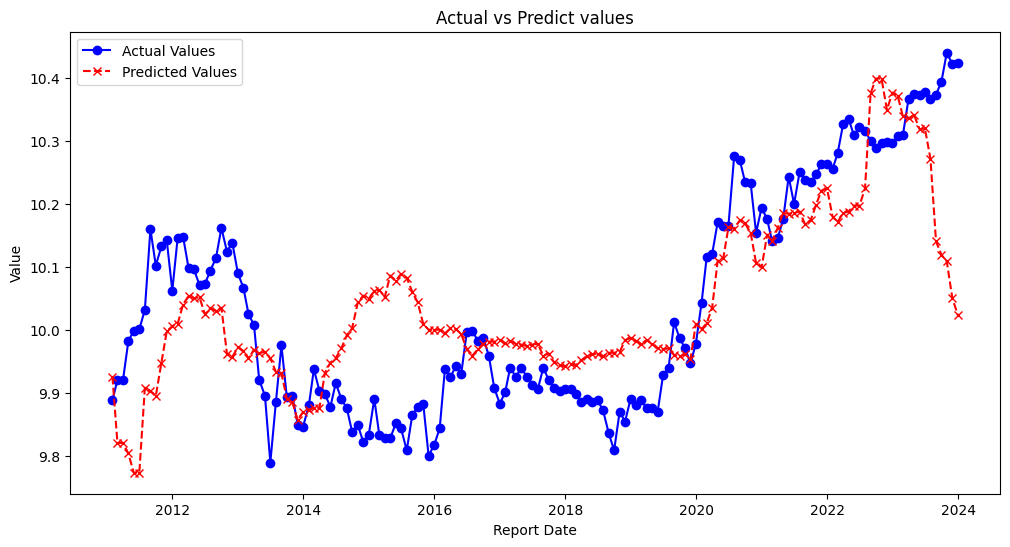

In [203]:
plt.figure(figsize=(12,6))
plt.plot(Gold_Factor_data['Report Date'],np.log(Gold_Factor_data['GoldBar_Sale']),label='Actual Values', color='blue',marker='o')
plt.plot(Prediction_df['Report Date'],np.log(Prediction_df['Predict GoldBar_Sale price (Forward looking)']),label='Predicted Values',
         color='red',linestyle='--',marker='x')
plt.xlabel('Report Date')
plt.ylabel('Value')
plt.title('Actual vs Predict values')
plt.legend()
plt.show()

In [202]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
# Mean Absolute Error (MAE)
MAE = mean_absolute_error(np.log(Gold_Factor_data['GoldBar_Sale']),np.log(Prediction_df['Predict GoldBar_Sale price (Forward looking)']))
# Mean Squared Error (MSE)
MSE = mean_squared_error(np.log(Gold_Factor_data['GoldBar_Sale']),np.log(Prediction_df['Predict GoldBar_Sale price (Forward looking)']))
# Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)
print('MAE : ',MAE) # ค่ายิ่งต้ำยิ่งดี
print('MSE : ',MSE) # ค่ายิ่งต้ำยิ่งดี
print('RMSE : ',RMSE) # ค่ายิ่งต้ำยิ้งดี

MAE :  0.09521426489602576
MSE :  0.014789767007600823
RMSE :  0.12161318599395718


Version 2

In [244]:
# Gold_Factor_data[['LOGIT']+Factor_interested].corr()
Gold_Factor_data[['GoldBar_Sale']+Factor_interested].corr()

,GoldBar_Sale,(Inflation)_LAG_6,LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1
GoldBar_Sale,1.000000,0.240230,-0.525835
(Inflation)_LAG_6,0.240230,1.000000,0.439577
LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1,-0.525835,0.439577,1.000000


Text(0, 0.5, 'Gold Price')

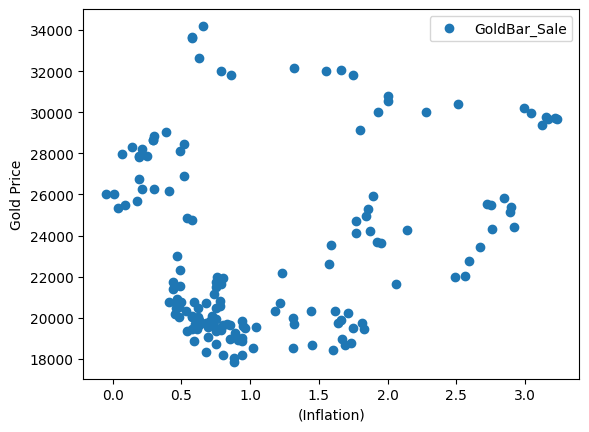

In [245]:
Gold_Factor_data.plot(x='(Inflation)',y='GoldBar_Sale',style='o')
plt.ylabel('Gold Price')

In [246]:
from sklearn.linear_model import LinearRegression

In [247]:
X = Gold_Factor_data[['(Inflation)']]
y = np.log(Gold_Factor_data[['GoldBar_Sale']])

In [248]:
# y = ax + b
lrm = LinearRegression()
lrm.fit(X,y)

LinearRegression()

In [249]:
lrm.intercept_ # b

array([9.98436069])

In [250]:
lrm.coef_ # a

array([[0.04861015]])

In [251]:
predictions = lrm.predict(X)
predictions

array([[10.04852609],
       [10.05435931],
       [10.06310914],
       [10.08449761],
       [10.10539997],
       [10.10880268],
       [10.11026099],
       [10.12289962],
       [10.12630233],
       [10.12484403],
       [10.12533013],
       [10.1141498 ],
       [10.11803861],
       [10.1165803 ],
       [10.11852471],
       [10.08838642],
       [10.07915049],
       [10.07769218],
       [10.07526168],
       [10.07040066],
       [10.07623388],
       [10.07380337],
       [10.07477557],
       [10.07040066],
       [10.06165083],
       [10.06067863],
       [10.04415118],
       [10.04172067],
       [10.03005424],
       [10.02713763],
       [10.02567932],
       [10.02081831],
       [10.01401289],
       [10.0188739 ],
       [10.02567932],
       [10.02859593],
       [10.03491525],
       [10.04366508],
       [10.04803999],
       [10.06505354],
       [10.06942846],
       [10.06748405],
       [10.07234507],
       [10.07331727],
       [10.06845626],
       [10

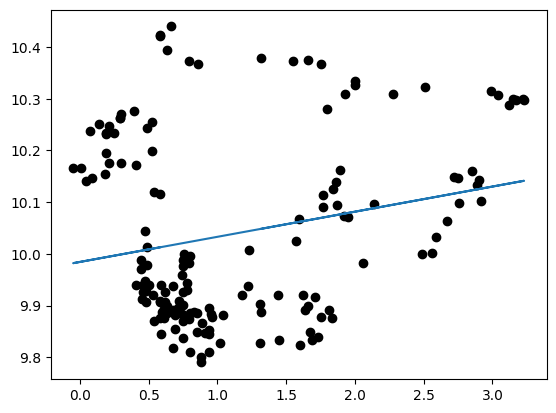

In [252]:
plt.scatter(X,y,color='black')
plt.plot(X,predictions)

In [253]:
from sklearn import metrics
metrics.mean_absolute_error(y,predictions)

0.14801448868618877

In [254]:
Gold_Factor_data[['GoldBar_Sale']+Factor_interested].corr()

,GoldBar_Sale,(Inflation)_LAG_6,LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1
GoldBar_Sale,1.000000,0.240230,-0.525835
(Inflation)_LAG_6,0.240230,1.000000,0.439577
LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1,-0.525835,0.439577,1.000000


In [268]:
from sklearn.linear_model import LinearRegression
X = Gold_Factor_data[Factor_interested]
y = np.log(Gold_Factor_data[['GoldBar_Sale']])

In [269]:
lrm = LinearRegression()
lrm.fit(X,y)

LinearRegression()

In [270]:
predictions = lrm.predict(X)
np.exp(predictions)

array([[20454.4270702 ],
       [18415.00993053],
       [18415.00993053],
       [18109.70134501],
       [17565.50097813],
       [17565.50097813],
       [20100.77722324],
       [19999.40939862],
       [19841.55004647],
       [20897.51618322],
       [21983.75860348],
       [22165.85696483],
       [22244.36014182],
       [22936.47336422],
       [23255.66161179],
       [23173.58942325],
       [23200.91458627],
       [22580.5112879 ],
       [22794.39912316],
       [22713.95478863],
       [22821.27716353],
       [21213.31416394],
       [21109.19208985],
       [21432.47820757],
       [21306.56332627],
       [21056.94845112],
       [21356.84026522],
       [21231.36975355],
       [21281.46925878],
       [21056.94845112],
       [20614.9879707 ],
       [20566.45745407],
       [19758.7009984 ],
       [19642.61948572],
       [19094.85094708],
       [19347.11738397],
       [19416.15794384],
       [19474.92178959],
       [19459.46575199],
       [20576.08526125],


In [271]:
from sklearn import metrics
metrics.mean_absolute_error(y,predictions) # MAE

0.09521426489602582

In [272]:
y.mean()

GoldBar_Sale    10.040206
dtype: float64

In [273]:
metrics.mean_squared_error(y,predictions) # MSE

0.014789767007600822

In [274]:
np.sqrt(metrics.mean_squared_error(y,predictions)) #RMSE

0.12161318599395718

In [275]:
lrm.score(X,y) # R-Square

0.532340099507458

In [ ]:
# MEAN : 10.040206
# MAE : 0.09521426489602582 ค่าต่ำ แสดงถึง โมเดลคาดการณ์ได้ดี
# MSE : 0.014789767007600822 ค่าต่ำแสดงถึง โมเดลคาดการณ์ได้ดี
# RMSE : 0.12161318599395718 # ค่าต่ำแสดงถึง ค่าความคลาดเคลื่อนจากค่าจริง
# R-Squared : 0.532340099507458 # โมเดลสามารถอธิบายความแปรผันของตัวแปรตามได้ประมาณ 53.23% 
# ซึ่งแสดงให้เห็นว่ามีความสัมพันธ์ระหว่างตัวแปรต้นและตัวแปรตาม แต่ยังไม่สูงมากนัก อาจมีปัจจัยอื่นที่ยังไม่ได้ถูกพิจารณา.

OLS Regression Model

In [212]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [213]:
X = Gold_Factor_data[Factor_interested]
y = (Gold_Factor_data[['GoldBar_Sale']])

In [214]:
model = sm.OLS(y,X)

In [215]:
# model.params # ceof
result = model.fit()
result.params 

(Inflation)_LAG_6                             15451.463327
LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1   -13601.743877
dtype: float64

In [216]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           GoldBar_Sale   R-squared (uncentered):                   0.734
Model:                            OLS   Adj. R-squared (uncentered):              0.730
Method:                 Least Squares   F-statistic:                              212.3
Date:                Wed, 17 Jul 2024   Prob (F-statistic):                    5.49e-45
Time:                        11:26:35   Log-Likelihood:                         -1689.6
No. Observations:                 156   AIC:                                      3383.
Df Residuals:                     154   BIC:                                      3389.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
(Inflation)_LAG_6                           1.545e+04    750.456     20.589      0.000     1.4e+04    1.69e+04
LOG_SCB_ประจำ_6_เดือน(อัตราดอกเบี้ย)_LAG_1  -1.36e+04   1985.548     -6.850      0.000   -1.75e+04   -9679.317
==============================================================================
Omnibus:                       19.344   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.388
Skew:                          -0.868   Prob(JB):                     1.38e-05
Kurtosis:                       3.658   Cond. No.                         2.91
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot Graph

       ! Gold_data -> File


<Axes: >

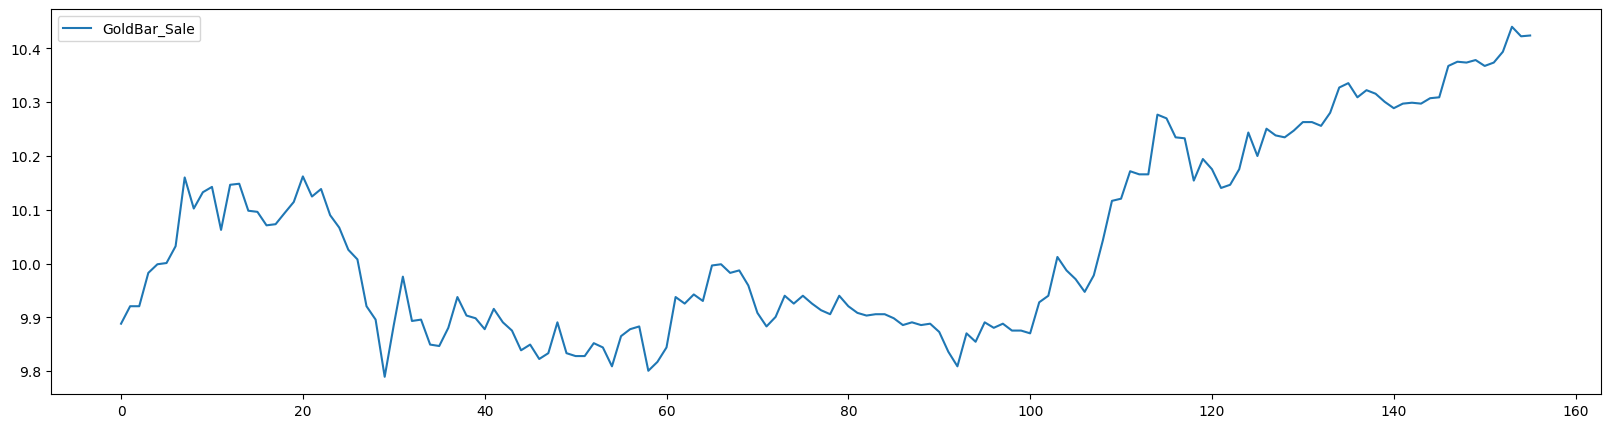

In [218]:
np.log(Gold_data['GoldBar_Sale']).plot(figsize = (20,5) , legend = True)

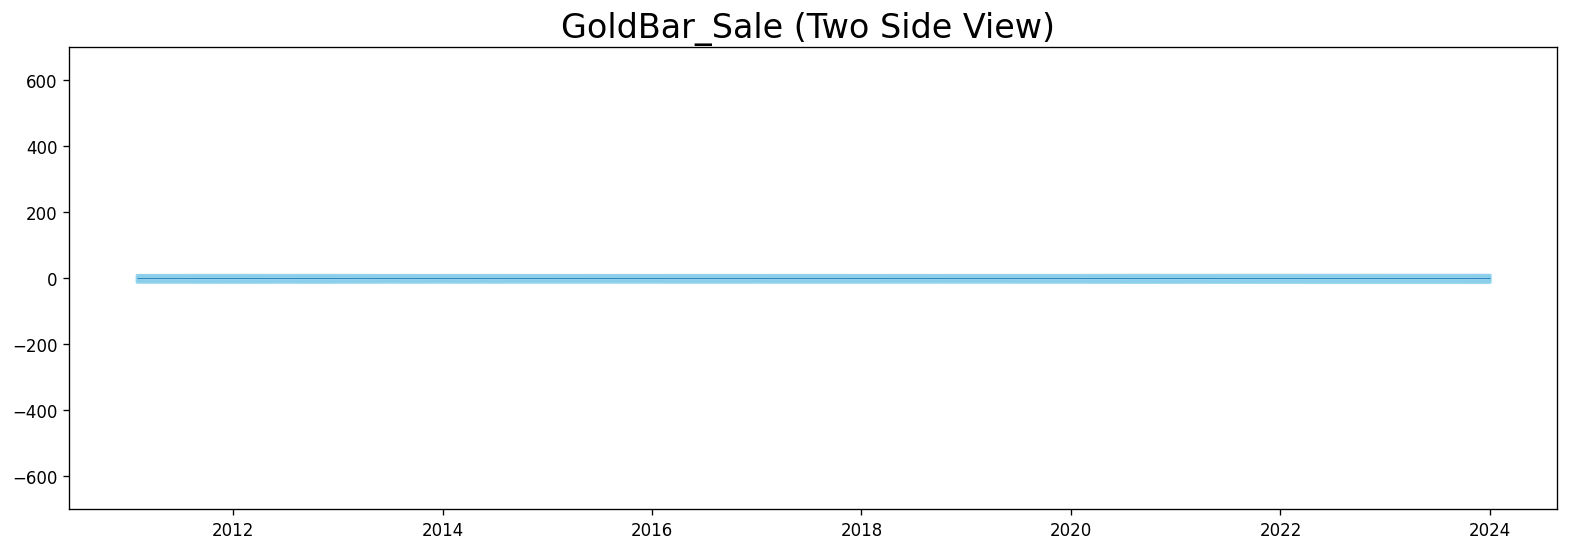

In [219]:
#Plot Two Side View
fig , ax = plt.subplots(1,1,figsize=(16,5) , dpi=120)
x = Gold_data['Report Date'].values

y1 = np.log(Gold_data['GoldBar_Sale'].values)

plt.fill_between( x , y1 = y1 , y2 = -y1 , alpha=0.9 , linewidth=2, color='skyblue')

plt.ylim(-700 , 700 )
plt.title('GoldBar_Sale (Two Side View) ' , fontsize = 20)

plt.hlines( y=0 , xmin = np.min(Gold_data['Report Date']) , xmax = np.max(Gold_data['Report Date']) , linewidth=0.5)

plt.show()

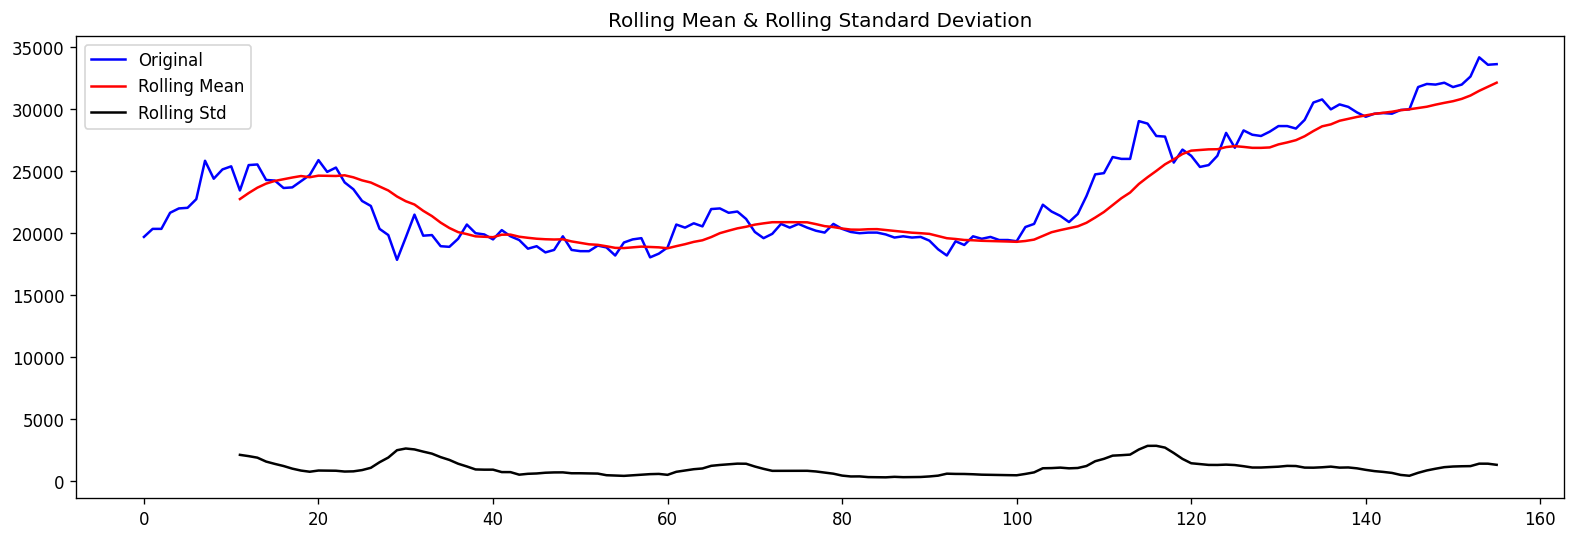

In [223]:
#ทดสอบ Stationary
rolling_mean = Gold_data['GoldBar_Sale'].rolling(window = 12).mean()
rolling_std = Gold_data['GoldBar_Sale'].rolling(window = 12).std()
fig , ax = plt.subplots(1,1,figsize=(16,5),dpi = 120)
plt.plot(Gold_data['GoldBar_Sale'],color = 'blue',label = 'Original')
plt.plot(rolling_mean , color = 'red' , label = 'Rolling Mean')
plt.plot(rolling_std , color = 'black' , label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [224]:
result = adfuller(Gold_data['GoldBar_Sale'])
print('ADF Statistic : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Critical Values:')
for key , value in result[4].items():
    print('\t{}: {}'.format(key,value))

ADF Statistic : -0.25132470546380203
p-value : 0.9321208869747761
Critical Values:
	1%: -3.4732590518613002
	5%: -2.880374082105334
	10%: -2.5768120811654525


In [225]:
# function
def get_stationarity(timeseries):
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    original = plt.plot(timeseries, color = 'blue' , label ='Original')
    mean = plt.plot(rolling_mean , color = 'red' , label = 'Rolling Mean')
    std = plt.plot(rolling_std , color = 'black' , label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block =False)
    # Dickey-Fuller Test
    result = adfuller(timeseries)
    print('ADF Statiestic: {} '.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key , value in result[4].items():
        print('\t{} : {}'.format(key,value))

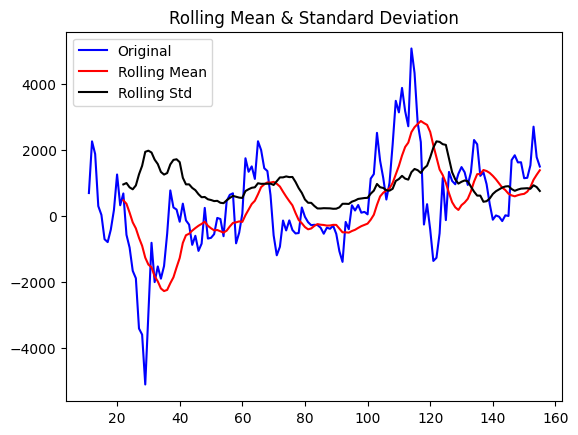

ADF Statiestic: -3.3308983120231344 
p-value: 0.013552562125553171
Critical Values:
	1% : -3.476597917537401
	5% : -2.8818291230495543
	10% : -2.5775887982253085


In [226]:
# วิธีแรกในการปรับข้อมูลให้เรียบคือ การลบด้วยค่าเฉลี่ยเคลื่อนที่ 12 เดือนย้อนหลังออกไป เพื่อกำจัด ฤดูกาลกับแนวโน้ม
rolling_mean = Gold_data['GoldBar_Sale'].rolling(window=12).mean()
df_log_minus_mean = Gold_data['GoldBar_Sale'] - rolling_mean
df_log_minus_mean.dropna(inplace=True)
get_stationarity(df_log_minus_mean)

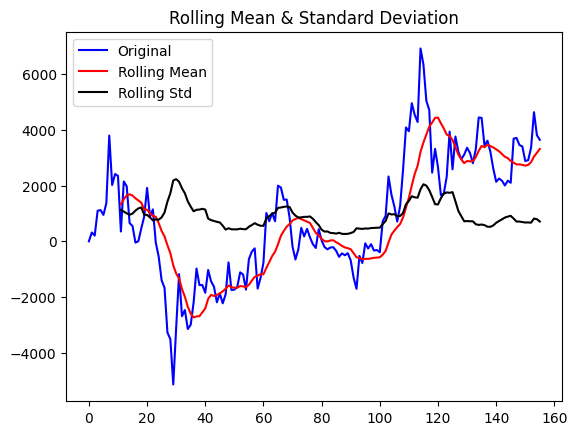

ADF Statiestic: -2.206766739159659 
p-value: 0.20379869426954533
Critical Values:
	1% : -3.4732590518613002
	5% : -2.880374082105334
	10% : -2.5768120811654525


In [227]:
# p value ต่ำแล้ว ลองวิธี take log
rolling_mean_exp_decay = Gold_data['GoldBar_Sale'].ewm(halflife=12,min_periods=0,adjust=True).mean()

df_log_exp_decay = Gold_data['GoldBar_Sale'] - rolling_mean_exp_decay
df_log_exp_decay.dropna(inplace = True)
get_stationarity(df_log_exp_decay)

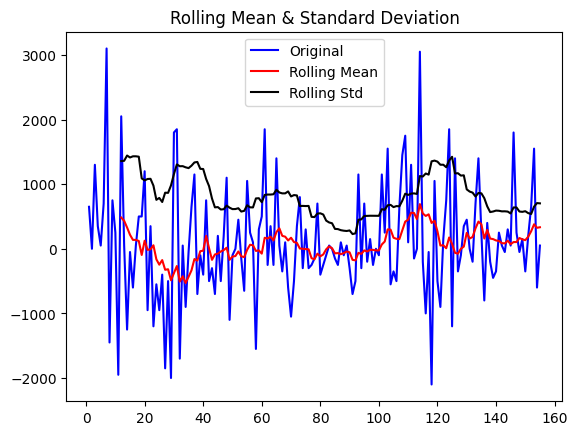

ADF Statiestic: -13.656836430155131 
p-value: 1.5480057912548305e-25
Critical Values:
	1% : -3.473542528196209
	5% : -2.880497674144038
	10% : -2.576878053634677


In [228]:
# วิธีลบด้วยค่าก่อนหน้า
df_log_shift = Gold_data['GoldBar_Sale'] - Gold_data['GoldBar_Sale'].shift()
df_log_shift.dropna(inplace = True)
get_stationarity(df_log_shift)

สร้าง ARIMA Model

In [229]:
# import libaries
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pmdarima as pm
from pmdarima import model_selection
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import joblib
import os

In [230]:
# 1,1,2 ARIMA Model
model = pm.ARIMA(order=(1,1,2),seasonal=False)
model_fit = model.fit(Gold_data['GoldBar_Sale'],disp=0)
print(model_fit.summary())

C:\Users\temp5\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
C:\Users\temp5\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\temp5\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  156
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1269.331
Date:                Wed, 17 Jul 2024   AIC                           2548.662
Time:                        11:29:28   BIC                           2563.879
Sample:                             0   HQIC                          2554.843
                                - 156                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     72.3140    263.937      0.274      0.784    -444.993     589.621
ar.L1          0.2731      2.607      0.105      0.917      -4.837       5.383
ma.L1         -0.3123      2.600     -0.120      0.9

In [231]:
# 1,1,1 ARIMA Model
model = pm.ARIMA(order=(1,1,1),seasonal=False)
model_fit = model.fit(Gold_data['GoldBar_Sale'],disp=0)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  156
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1269.381
Date:                Wed, 17 Jul 2024   AIC                           2546.762
Time:                        11:29:28   BIC                           2558.936
Sample:                             0   HQIC                          2551.707
                                - 156                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     87.9640    196.459      0.448      0.654    -297.089     473.017
ar.L1          0.0038      1.992      0.002      0.998      -3.901       3.909
ma.L1         -0.0408      1.986     -0.021      0.9

C:\Users\temp5\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


C:\Users\temp5\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['seasonal']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


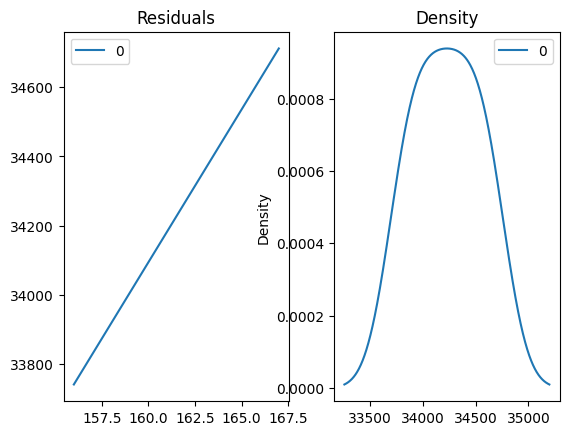

In [232]:
# เลือกอันที่ P > |Z| ดีๆ คือค่าน้อยๆ
preds, conf_int = model_fit.predict(n_periods=12, return_conf_int=True)
residuals = pd.DataFrame(preds)
fig,ax = plt.subplots(1,2)
residuals.plot(title="Residuals",ax=ax[0])
residuals.plot(kind='kde',title='Density',ax=ax[1])
plt.show()

ARIMA MODEL pmdarima 

In [233]:
arima = pm.auto_arima(Gold_data['GoldBar_Sale'], start_p=1, start_q=1, max_p=12, max_q=5, max_order = 12,
                     trace=False, suppress_warnings=True, stepwise = True,
                     error_action='ignore', m=12)
period_predict = 10
preds, conf_int = arima.predict(n_periods=12*period_predict, return_conf_int=True)
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  156
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1267.587
Date:                              Wed, 17 Jul 2024   AIC                           2541.174
Time:                                      11:29:41   BIC                           2550.304
Sample:                                           0   HQIC                          2544.882
                                              - 156                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.8231      0.219      3.752      0.000       0.393       1.253
ma.S.L12      -0.7369      0.252     -2.928      0.003      -1.230      -0.244
sigma2      7.427e+05   6.71e+04     11.062      0.000    6.11e+05    8.74e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):                15.53
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.45
Prob(H) (two-sided):                  0.44   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [234]:
preds

156    33732.939932
157    33826.960198
158    34053.291215
159    34175.054362
160    34188.187541
           ...     
271    37247.969985
272    37240.618350
273    37269.772131
274    37244.269049
275    37254.133521
Length: 120, dtype: float64

In [235]:
def eomonth(d, months=0):
    months = int(months)
    if isinstance(d, list):
        return [eomonth(d0, months) for d0 in d]
    elif isinstance(d, pd.Series):
        return d.map(lambda d0: eomonth(d0, months))
    else:
        y, m = divmod(d.month + months + 1, 12)
        # y, m = int(y), int(m)
        if m==0:
            y -= 1
            m = 12
        return pytz.UTC.localize(datetime.datetime(d.year + y, m, 1) - datetime.timedelta(days=1))

In [236]:
Date = Gold_data['Report Date']
last_date = Date.iloc[-1]
arr = []
period = period_predict*12
for i in range(period):
    next_month = eomonth(last_date,i+1)
    arr = np.append(arr,next_month)

Date_forecast_period = pd.DataFrame(arr)
Date_forecast_period.columns = ['Report Date']
Date_forecast_period['Report Date'] = Date_forecast_period['Report Date'].dt.tz_localize(None)

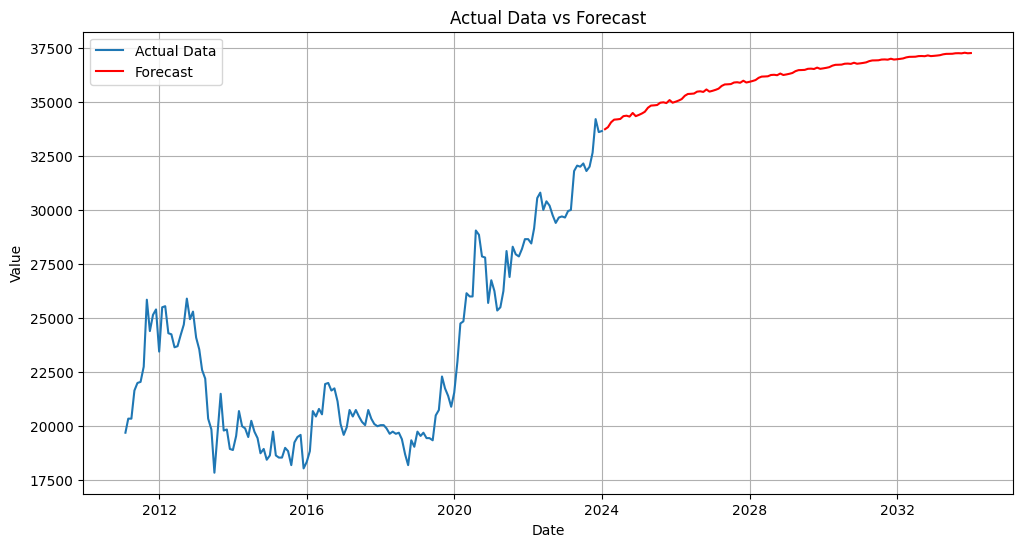

In [237]:
plt.figure(figsize=(12,6))
plt.plot(Gold_data['Report Date'] , Gold_data['GoldBar_Sale'] , label = 'Actual Data')
plt.plot(Date_forecast_period,preds , label='Forecast' , color = 'red')
# plt.fill_between(Date_forecast_period , conf_int[:,0],conf_int[:,1] , color='pink' , alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual Data vs Forecast')
plt.legend()
plt.grid(True)
plt.show()

Forecast GoldBar_Sale price in Thailand with Feature_Seletion by LinearRegression and ARIMA model